In [1]:
# libraries
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox

from PIL import ImageTk, Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from keras.utils.np_utils import to_categorical 
from keras.models import load_model
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("data\HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


<AxesSubplot: xlabel='dx', ylabel='count'>

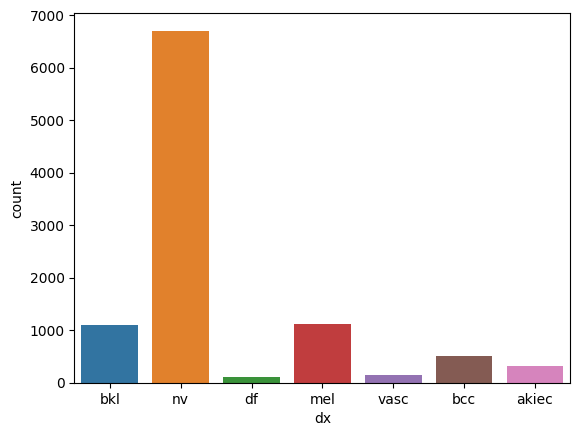

In [4]:
# %matplotlib qt5 
# %matplotlib widget # embedded
sns.countplot(x = "dx", data = df)

In [5]:
img_folder_name = 'img/'
extension = ".jpg"
#sample image path = img_folder_name + image_id[i] + extension
# ismi path olan, dosya yoluna eşit değerleri olan yeni column oluşturulur.
df['path'] = [ img_folder_name + i + extension for i in df['image_id'] ]
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,img/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,img/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,img/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,img/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,img/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,img/ISIC_0032854.jpg


- df['path']'in içerisindeki her bir satırı fonksiyon yapması için map kullanılır. 
- x = 'path' e karşılık gelir. 
- x pathindeki resmi aç diyoruz. 
- Ancak bu resmi biz array olarak tanımlamak ve tutmakistiyoruz, bu yüzden np.asarray cast'ı ekleriz.

- Bu işlem birkaç dakika süreceği için aşağıda ```df.to_pickle("df.pkl")``` işlemini yaparak, verilerin son halini df.pkl dosyasında tutmuş oluruz.

In [6]:
df["image"] = df["path"].map( lambda x: np.asarray(Image.open(x).resize((100,75))))

In [7]:
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,img/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,img/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


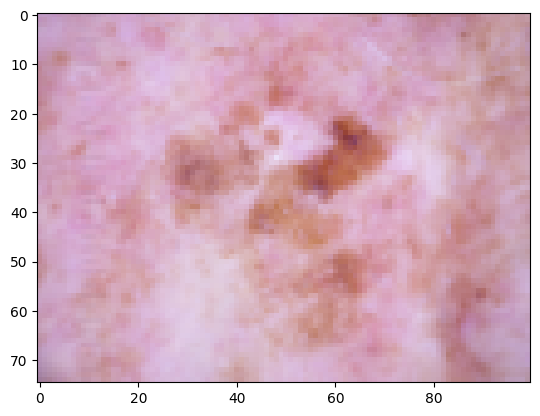

In [8]:
# %matplotlib inline
plt.imshow(df["image"][0]) # imshow: bir matrisi image şeklinde gösterir.

In [9]:
# string değerleri numeric değerlere kodlar(convert).
df["dx_idx"] = pd.Categorical(df["dx"]).codes

In [10]:
df.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,dx_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",2


In [11]:
df.to_pickle("df.pkl") # Yukarıda yaptığımız işlemleri her seferinde yapmak zahmetli. Verimizi convert edeceğimiz, verimizi depolayan bir pickle dosyası olduğunu bilmek yeterli.

In [12]:
df = pd.read_pickle("df.pkl") # verilerimizi hızlıca yukarıdaki adımları yapmaya gerek kalmadan bu bloku debug ederiz, dataFrame nesnesine dönüştürürek.
df.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,dx_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",2


In [13]:
x_train = np.asarray(df["image"].tolist())

In [14]:
#  stardardization
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train = (x_train - x_train_mean)/x_train_std

In [15]:
# one hot encoding
target_class_count = len(pd.unique(df['dx_idx']))
y_train = to_categorical(df["dx_idx"], num_classes = target_class_count)

In [16]:
print("x_train: " , x_train.shape)
print("y_train: " , y_train.shape)

x_train:  (10015, 75, 100, 3)
y_train:  (10015, 7)


In [17]:
x_train.shape # 10015 instance, 75x100, 3 (RGB color image)
n_row = x_train.shape[1]
n_col = x_train.shape[2]
col_type = x_train.shape[3]
print(n_row, n_col, col_type)

75 100 3


In [18]:
input_shape = (n_row, n_col, col_type)
target_class_count

7

In [19]:
model = Sequential() # Sırayla tüm CNN layerlerımızı adım adım eklememiz için gerekli.

In [20]:
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "Same", input_shape = input_shape))
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "Same"))

In [21]:
model.add(MaxPool2D(pool_size = (2,2)))

In [22]:
model.add(Dropout(0.25)) # overfitting'i önlemek için dropout ekleriz.

In [23]:
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "Same", input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", padding = "Same"))

In [24]:
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5)) # overfitting'i önlemek için dropout ekleriz.

In [25]:
 model.add(Flatten())

In [26]:
model.add(Dense(128,activation="relu")) # nöron sayısı ne kadar fazla olurs o kadar iyi ancak veri kapasitesi artacak.
model.add(Dropout(0.5)) # overfitting'i önlemek için dropout ekleriz.

In [27]:
model.add(Dense(target_class_count, activation="softmax"))
model.summary() # özetleyeceğimiz kısım.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 50, 64)        36928     
                                                        

In [28]:
optimizer = Adam(learning_rate = 0.0001) # The 'lr' argument is deprecated, so we use learnign_rate.
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [29]:
history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = 64, 
                    epochs = 50,
                    verbose = 1,
                    shuffle = True)

Epoch 1/50
157/157 [==============================] - 177s 1s/step - loss: 1.0354 - accuracy: 0.6638
Epoch 2/50
157/157 [==============================] - 167s 1s/step - loss: 0.9154 - accuracy: 0.6712
Epoch 3/50
157/157 [==============================] - 174s 1s/step - loss: 0.8623 - accuracy: 0.6842
Epoch 4/50
157/157 [==============================] - 166s 1s/step - loss: 0.8338 - accuracy: 0.6967
Epoch 5/50
157/157 [==============================] - 164s 1s/step - loss: 0.8075 - accuracy: 0.7071
Epoch 6/50
157/157 [==============================] - 169s 1s/step - loss: 0.7854 - accuracy: 0.7152
Epoch 7/50
157/157 [==============================] - 164s 1s/step - loss: 0.7600 - accuracy: 0.7246
Epoch 8/50
157/157 [==============================] - 164s 1s/step - loss: 0.7443 - accuracy: 0.7298
Epoch 9/50
157/157 [==============================] - 164s 1s/step - loss: 0.7340 - accuracy: 0.7282
Epoch 10/50
157/157 [==============================] - 163s 1s/step - loss: 0.7134 - accura

In [31]:
# load models
model1 = load_model("my_model1.h5")
model2 = load_model("my_model2.h5")

In [32]:
index = 0
y_train[index] # 10. indexin gerçekteki değeri, şimdi aşağıda tahminleme yapalım.
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,dx_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,img/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,img/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,img/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,img/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5...",2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,img/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ...",2


In [33]:
y_pred = model2.predict(x_train[index].reshape(1,75,100,3))
print(y_pred)
print("Maximum value: ",np.max(y_pred)) # Tüm olasılıkların toplamının 1 olmasını bekleriz.
print("Sum: ", np.sum(y_pred)) # Tüm olasılıkların toplamının 1 olmasını bekleriz.

1/1 [==============================] - 0s 479ms/step
[[1.3428081e-02 2.8389763e-05 9.7300488e-01 3.6142305e-06 1.8642118e-04
  1.3348542e-02 6.3339862e-09]]
Maximum value:  0.9730049
Sum:  0.99999994


In [34]:
reel_index = np.argmax(y_train[index])
predict_index = np.argmax(y_pred)
print("Predict result:", predict_index)
print("Reel result:", np.argmax(y_train[index]))

# predicted_cancer = list(df.dx.unique())[predict_index] #output
# reel_cancer = list(df.dx.unique())[reel_index]

# print("predicted cancer: ", predicted_cancer)
# print("reel cancer: ", predicted_cancer)

reel_filter = df["dx_idx"]==reel_index
reel_cancer=df["dx"][reel_filter].unique()
print("Reel cancer: ", reel_cancer[0])

predict_filter = df["dx_idx"]==predict_index
predicted_cancer=df["dx"][predict_filter].unique()
print("Predict cancer: ", predicted_cancer[0])

Predict result: 2
Reel result: 2
Reel cancer:  bkl
Predict cancer:  bkl


In [35]:
## global variables
img_name = ""
count = 0
img_jpg = ""

In [36]:
# parent widget => window
window = tk.Tk()
window.geometry("1080x640")
window.wm_title("Skin Cancer Classification")

## frames
frame_left = tk.Frame(window, width = 540, height = 640, bd = "2") #border size=bd=sınırlarının genişliği
frame_left.grid(row = 0, column = 0)

frame_right = tk.Frame(window, width = 540, height = 640, bd = "2")
frame_right.grid(row = 0, column = 1)

frame1 = tk.LabelFrame(frame_left, text = "Image", width = 540, height = 500)
frame1.grid(row = 0, column = 0)

frame2 = tk.LabelFrame(frame_left, text = "Model and Save", width = 540, height = 140)
frame2.grid(row = 1, column = 0)

frame3 = tk.LabelFrame(frame_right, text = "Features", width = 270, height = 640)
frame3.grid(row = 0, column = 0)

frame4 = tk.LabelFrame(frame_right, text = "Result", width = 270, height = 640)
frame4.grid(row = 0, column = 1, padx = 10)

In [37]:
# frame1
def imageResize(img):
    # For example: img.size= 1000x1200
    basewidth = 500

    # img.size[0] = 1000, So, 500/1000 = 0.5 = wpercent
    wpercent = (basewidth/float(img.size[0]))    

    # img.size[1] = 1200, So, 1200*0.5 = 600 = hsize
    hsize = int((float(img.size[1])*float(wpercent))) 

    # img.resize boyutları => 500x600 olmuş oldu
    img = img.resize((basewidth, hsize),Image.ANTIALIAS) # resize yaparken araları doldurmak için antialiasing yöntemi kullanılır. Ayrıntıya gerek yok.
    return img

In [38]:
def openImage():
    
    global img_name
    global count # yalnızca bir resim görüntülenmesi sağlamak için
    global img_jpg
    
    count += 1
    if count != 1:
        messagebox.showinfo(title = "Warning", message = "Only one image can be opened")
    else:
        img_name = filedialog.askopenfilename(initialdir = "img",title = "Select an image file")
        
        #02-Python GUI - Tkinter and PyQt5 with Real World Python Projects/04-Skin Cancer Classification Project with Tkinter/img/ISIC_0024306.jpg
        img_jpg = img_name.split("/")[-1].split(".")[0] # ISIC_0024306 (resim adı alınır)
        # image label
        tk.Label(frame1, text =img_jpg, bd = 3 ).pack(pady = 10)
    
        # open and show image
        img = Image.open(img_name)
        img = imageResize(img)
        img = ImageTk.PhotoImage(img) # Tk kütüphanesiyle kullanabilmek için uygun formata sokmak zorundayız. 
        panel = tk.Label(frame1, image = img) # frame1'de duracak olan resmi belirttik.
        panel.image = img
        panel.pack(padx = 15, pady = 10)
        
        # image feature
        data = pd.read_csv("data\HAM10000_metadata.csv")
        cancer = data[data.image_id == img_jpg]
        # print(cancer) dersek aşağıdaki gibi output verir. Size'ı 7 dir.
        # lesion_id   image_id      dx  dx_type     age  sex   localization
        # HAM_0000550 ISIC_0024306  nv  follow_up  45.0  male    trunk

        for i in range(cancer.size):
            x = 0.4 # labellar 0.1di biraz sağa koyuyorum
            y = (i/10)/2
            tk.Label(frame3, font = ("Times",12), text = str(cancer.iloc[0,i])).place(relx = x, rely = y)

In [39]:
# menu
menubar = tk.Menu(window)
window.config(menu = menubar)
file = tk.Menu(menubar)
menubar.add_cascade(label = "File",menu = file)
file.add_command(label = "Open", command = openImage)

In [40]:
# frame3
def classification():
    
    if img_name != "" and models.get() != "": #image ve modeller boş olmaması lazım
        
        # model selection
        if models.get() == "Model1":
            classification_model = model1 # cnn'de kaydediğimiz model1
        else:
            classification_model = model2 # cnn'de kaydediğimiz model1
        
        z = df[df.image_id == img_jpg] # filtering
        z = z.image.values[0].reshape(1,75,100,3) #values[0]=image_id column
        
        # datasetini train etmeden önce standardize etmiştik, aynı şekilde predict edilecek datayı da standardize ederiz.
        z = (z - x_train_mean)/x_train_std

        pred = classification_model.predict(z)[0]
        p_index = np.argmax(pred)
        p_filter = df["dx_idx"]==p_index
        pred_cancer=df["dx"][p_filter].unique()
        pred_cancer[0]
    

        print("Predict cancer: ", predicted_cancer[0])
        print("Predict: ", pred)

        for i in range(len(pred)):
            x = 0.5
            y = (i/10)/2
            
            if i != p_index: #outputu farklı renkte yapacağız.
                tk.Label(frame4,text = str(pred[i])).place(relx = x, rely = y)
            else:
                tk.Label(frame4,bg = "yellow",text = str(pred[i])).place(relx = x, rely = y)
        
        if chvar.get() == 1: #sonucları kaydedeceğiz. defaut 0 ayarlamıştık. 0 => seçili değil, 1 => seçili anlamına gelir.
            
            val = entry.get()
            entry.config(state = "disabled") # enrtry'yi get ettikten sonra, disabled yapacağız.
            path_name = val + ".txt" # result1.txt
            
            save_txt = img_name + "--" + str(pred_cancer[0])
            
            text_file = open(path_name,"w")
            text_file.write(save_txt)
            text_file.close()
        else:
            print("Save is not selected")
    else:
        messagebox.showinfo(title = "Warning", message = "Choose image and Model First!")
        tk.Label(frame3, text = "Choose image and Model First!" ).place(relx = 0.1, rely = 0.6)

In [41]:
columns = ["lesion_id","image_id","dx","dx_type","age","sex","localization"]
for i in range(len(columns)):
    x = 0.1
    y = (i/10)/2 #featureslerı alt alta artacak şekilde yazdırma için
    tk.Label(frame3, font = ("Times",12), text = str(columns[i]) + ": ").place(relx = x, rely = y)

In [42]:
classify_button = tk.Button(frame3, bg = "red", bd = 4, font = ("Times", 13),activebackground = "orange", text = "Classify", command = classification)
classify_button.place(relx = 0.1, rely = 0.5)

In [43]:
# frame 4 => classication labels
labels = df.dx.unique()

for i in range(len(labels)):
    x = 0.1
    y = (i/10)/2
    p_filter = df["dx_idx"]==i
    pred_cancer=df["dx"][p_filter].unique()
    tk.Label(frame4, font = ("Times",12), text = str(pred_cancer[0]) + ": ").place(relx = x, rely = y)

In [44]:
# frame 2 
# combo box
model_selection_label = tk.Label(frame2, text = "Choose classification model: ")
model_selection_label.grid(row = 0, column = 0, padx = 5)

models = tk.StringVar() #modelerimi string variable olarak okuyacağız.
model_selection = ttk.Combobox(frame2, textvariable = models, values = ("Model1","Model2"), state = "readonly")
model_selection.grid(row = 0, column = 1, padx = 5)

# check box
chvar = tk.IntVar()
chvar.set(0) # default 0
xbox = tk.Checkbutton(frame2, text = "Save Classification Result", variable = chvar)
xbox.grid(row = 1, column =0 , pady = 5)

# entry
entry = tk.Entry(frame2, width = 23)
entry.insert(string = "Saving name...",index = 0) #placeholder => txt file name
entry.grid(row = 1, column =1 )

In [45]:
window.mainloop()

C:\Users\busra\AppData\Local\Temp\ipykernel_1192\1615366195.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize),Image.ANTIALIAS) # resize yaparken araları doldurmak için antialiasing yöntemi kullanılır. Ayrıntıya gerek yok.


1/1 [==============================] - 0s 23ms/step
Predict cancer:  bkl
Predict:  [3.95683783e-05 1.14860335e-07 4.74795401e-02 2.41410056e-08
 9.45007861e-01 7.47289322e-03 1.93814034e-10]
Save is not selected
